# Palmer Penguins

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Antarctica_relief_location_map.jpg/480px-Antarctica_relief_location_map.jpg).

This notebook contains my analysis of the famous Palmer Penguins dataset.
The 3 categorical values are species :3, island :3 and sex :2.
 There are 4 continuous variables which are bill_length_mm, showing length of the culmen /bill. Bill_depth_mm, showing the depth. The flipper_length_mm, showing length of the flipper. And body_mass_g, showing mass in grams. Year is a discrete variable also.
I have concentrated on the bill length and depth. The reason for this that they are both continuous variables in the same measurement type (mm).

The data set is available [onGitHub](https://allisonhorst.github.io/palmerpenguins/).

I have looked at Allison Horst's work alot. Her graphs are beautiful and very elaborate.
The work she did was through the "R" package and the visuals displayed are stunning.
I believe some of my plots are similar. My scatter plot with bill length and depth seem to be very like the one she has..

### References.
***
https://github.com/allisonhorst/palmerpenguins
https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python

In [25]:
# Libraries required and imported.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the Penguins Data Set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [27]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


There are 7 Columns and 344 rows.

In [28]:
# Lets look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

With this information we can now see the variables: species, island, bill length, bill depth,
flipper length, body mass and sex.

In [29]:
# First 5 rows 
df.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1  

In [30]:
# Last 5 rows 
df.tail

<bound method NDFrame.tail of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1  

In [31]:
# Inspect types
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Here it can be seen which variables have decimal number information i.e length and weight variables.

In [32]:
# Sex of the Penguins
df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [33]:
# Count the number of Penguins of each sex.
sex_count = df["sex"].value_counts ()

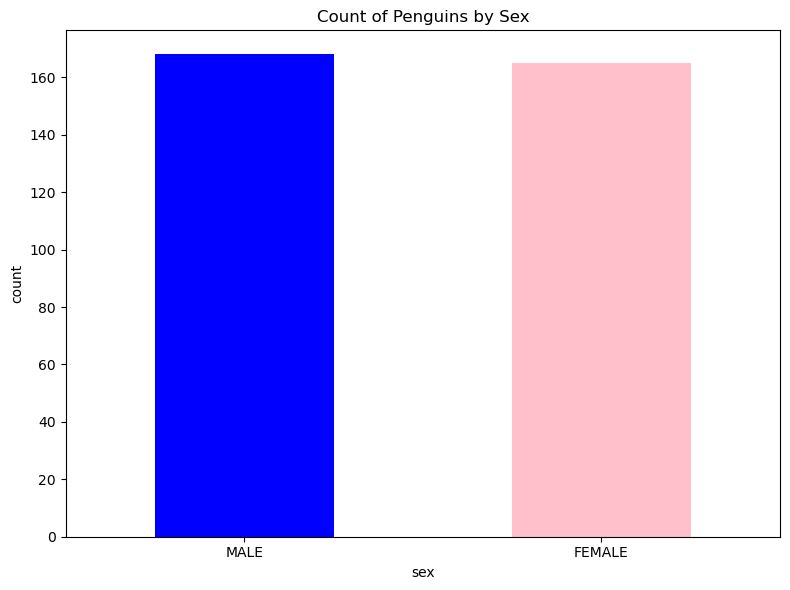

In [34]:
# Generating a bar chart showing male and female penguins. ( bar charts are useful for comparing categorical values)
plt.figure(figsize = (8, 6))
sex_count.plot(kind = "bar", color =["blue","pink"])
plt.title("Count of Penguins by Sex") 
plt.xlabel("sex")
plt.ylabel("count")
plt.xticks(rotation=0) # not strictly needed here but useful bit of code if bars overlap
plt.tight_layout() # helps keep plt elements fitting well within figure area
plt.show()                                       

In [35]:
# Describe the Data Set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Now with the information above we can see how the information is distributed. The count stands at 342. It shows the mean, standard deviation, the min and max values and also the percentages.

The mean in (mm) for Bill Length is 43.921930.
The mean in (mm) for Bill Depth is 17.151170.
The mean in (mm) for Flipper Length is 200.915205.
The mean in (grams) for Body Mass is 4201.754386.

In [36]:
# lets look at the species
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In Species, there are 3 and their quantity. Adelie with 152, Gentoo with 124 and Chinstrap with 68.

## Tables

***

| Species     || Bill Length (mm) | Body Mass (g) |
| ------------|| ---------------- | ------------- |
| Adelie      ||              38.8|           3701|
| Chinstrap   ||              48.8|           3733|
| Gentoo      ||              47.5|           5076|

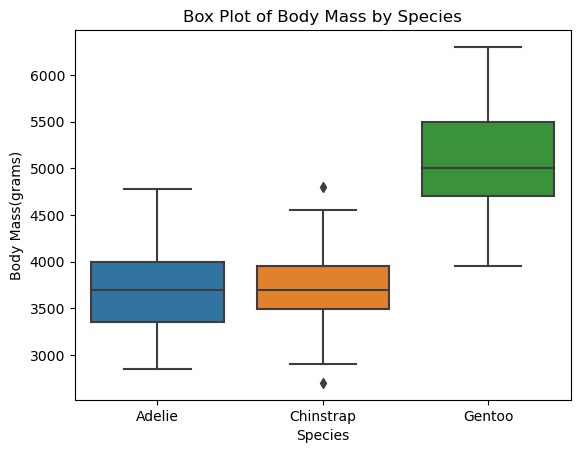

In [37]:
# Generate a box plot to show the body mass by species  (seaborn used to create the box plot)
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.xlabel('Species')
plt.ylabel('Body Mass(grams)')
plt.title('Box Plot of Body Mass by Species')
plt.show()

With the above box plot the body mass of the 3 Species can be seen.
Box plots are useful to show distribution of numeric variables and suspected outliers can be identified. Median values across different catagories can be observed. There appears to be outliers for the Chinstrap Species. Gentoo species are large! It would be hard to mistake them based om their body mass.

## Selection of two variables from the data set and an analysis of how correlated they are.
***

In [38]:
# Get just the bill Length
bill_len = df["bill_length_mm"]

# Show
print(bill_len)

# Type
print(type(bill_len))

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


In [39]:
# Just get the numpy array
bill_len = bill_len.to_numpy()

# Show
bill_len

array([39.1, 39.5, 40.3,  nan, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       37.8, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.8, 37.7,
       35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5,
       40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36. , 44.1,
       37. , 39.6, 41.1, 37.5, 36. , 42.3, 39.6, 40.1, 35. , 42. , 34.5,
       41.4, 39. , 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6,
       35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9,
       37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9,
       38.3, 38.9, 35.7, 41.1, 34. , 39.6, 36.2, 40.8, 38.1, 40.3, 33.1,
       43.2, 35. , 41. , 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2,
       38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2,
       37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39. , 44.1, 38.5, 43.1,
       36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37. , 39.7, 40.2, 40.6, 32.1,
       40.7, 37.3, 39. , 39.2, 36.6, 36. , 37.8, 36

In [40]:
# Bill Depth.
b_depth = df["bill_depth_mm"].to_numpy()

# show.
b_depth

array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 17.8, 19. , 20.7, 18.4, 21.5, 18.3, 18.7,
       19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8,
       18.9, 17. , 21.1, 20. , 18.5, 19.3, 19.1, 18. , 18.4, 18.5, 19.7,
       16.9, 18.8, 19. , 18.9, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1,
       18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17. , 18.2, 17.1, 18. ,
       16.2, 19.1, 16.6, 19.4, 19. , 18.4, 17.2, 18.9, 17.5, 18.5, 16.8,
       19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6,
       19.2, 18.8, 18. , 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1,
       18.5, 17.9, 20. , 16. , 20. , 18.6, 18.9, 17.2, 20. , 17. , 19. ,
       16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17. , 20.5, 17. , 18.6, 17.2,
       19.8, 17. , 18.5, 15.9, 19. , 17.6, 18.3, 17.1, 18. , 17.9, 19.2,
       18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5,
       17. , 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17

Text(0.5, 1.0, ' Histogram of Bill Length')

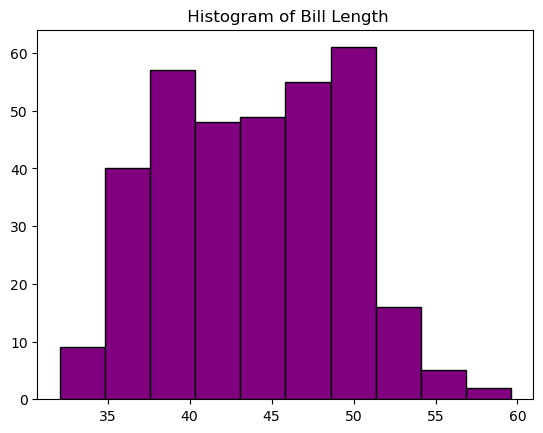

In [41]:
# Generate Histogram for bill length.
plt.hist(bill_len, color = "purple", edgecolor = "black")
plt.title(" Histogram of Bill Length")


Histograms are used to show distribution of a continuous/numeric variable. They are useful for looking at the range of numeric values and for detecting outliers. They can indicate whether information is normal, symmetric or skewed.


Text(0.5, 1.0, 'Palmer Penguin Data Set')

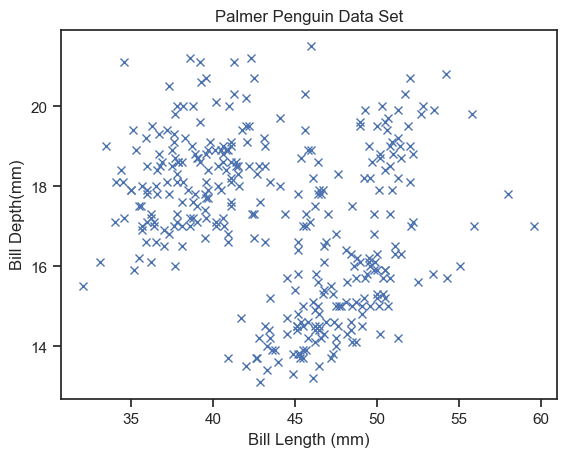

In [62]:
# Simple Scatter Plot. (using matplotlib)
plt.plot(bill_len, b_depth, "x")

# Axis Labels.
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth(mm)")

# Title
plt.title("Palmer Penguin Data Set")


()

ValueError: x and y must be the same size

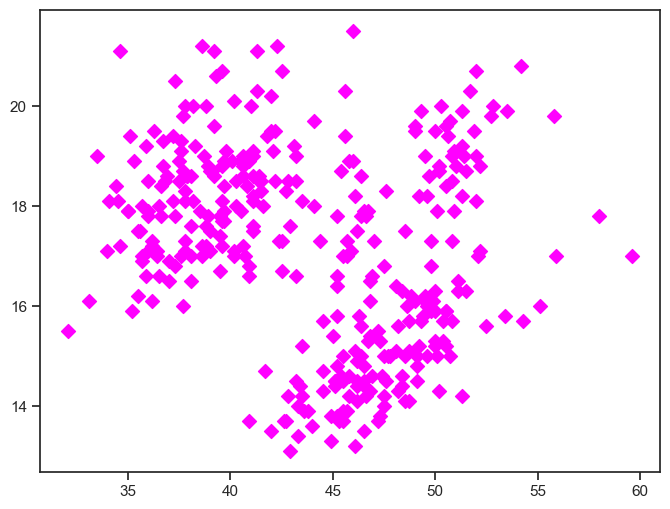

In [76]:
# flipper Length
flip_len = df["flipper_length_mm"]

# Created a scatter plot (changing style and color of markers, legend grid title and labels)
plt.figure(figsize=(8, 6))
plt.scatter(bill_len, b_depth, s=50, c = "magenta", marker ='D', label='Diamond')
plt.scatter(bill_len, flip_len, s = 50, c ="coral", marker= 'H', label='Hexagon')
plt.scatter(b_depth, flip_len, s = 50, c = "aqua", marker ='*', label ='Star')
plt.title(" Palmer Penguins Physical Features")
plt.xlabel("Bill length")
plt.ylabel("Measurements")
plt.grid("TRUE")
plt.legend()
plt.show

The diamonds in the color magenta show the relationship with Bill Length and Bill Depth. They are tightly bunched in an almost horizontal line.

The hexagons in the color coral show the relationship with Bill Length and Flipper Length. There are some outliers visable here.

The stars in the color aqua show the relationship with Bill Depth and Flipper Length. They have two small groupings.

While this is interesting I will now Look at bill depth and length by species. I feel this will be more insightful.

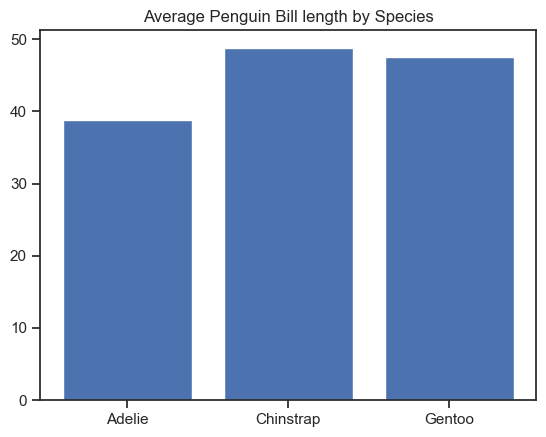

In [ ]:
# Data preparation 
# code from Data Camps(https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python)
penguins_grouped = df[['species', 'bill_length_mm']].groupby('species').mean().reset_index()

# selecting two columns from the original penguins DataFrame: 'species' and 'bill_length_mm'. grouping the data,
# by the 'species' column and calc the mean bill length for each species. Then reset the index, to create new DataFrame,
# with 3 species and their corresponding average bill lengths.

# Creating a bar chart
plt.bar(penguins_grouped['species'], penguins_grouped['bill_length_mm'])
plt.title('Average Penguin Bill length by Species')
plt.show()

Adelie have the shortest Bill Length. Chinstrap have very slightly longer bills than Gentoo.

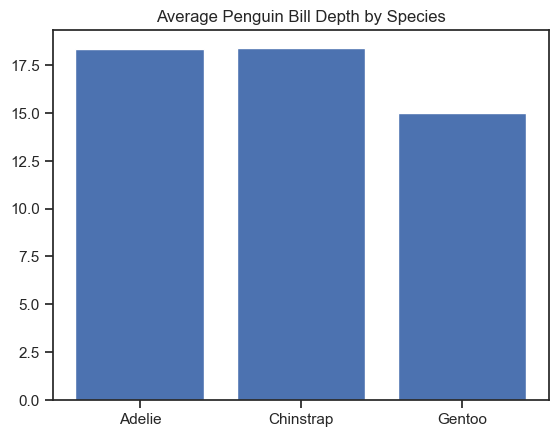

In [ ]:
# repeating above except looking at bill depth.
penguins_grouped = df[['species', 'bill_depth_mm']].groupby('species').mean().reset_index()

# Creating a bar chart
plt.bar(penguins_grouped['species'], penguins_grouped['bill_depth_mm'])
plt.title('Average Penguin Bill Depth by Species')
plt.show()

The Gentoo have flatter bills than Adelie and Chinstrap. 

Text(0.5, 1.0, ' Palmer Penguin Data Set')

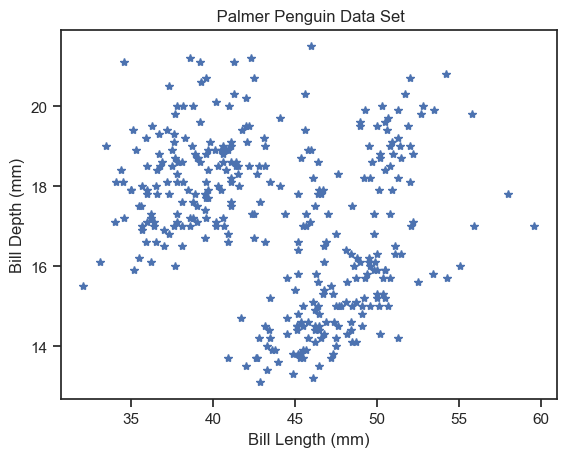

In [87]:
# Create new figure and set of axes.
fig, ax = plt.subplots()

# Simple Plot.
ax.plot(bill_len, b_depth, "*",)

# Axis Labels.
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

# Title
ax.set_title(" Palmer Penguin Data Set")


In [109]:
df.corr


<bound method DataFrame.corr of      species  bill_len  b_depth
0     Adelie        40       15
1  Chinstrap        45       18
2     Gentoo        50       20>

#### Add Best Fit Line
***

 $ y = mx + c = p_1 x^1 + p_0 = p_1 x + p_0 $

***
###
End.